In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv
/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv


****

# **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Reading Train Dataset**

In [3]:
train_df = pd.read_csv('/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv')

In [4]:
train_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.880,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.950,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10537,10538,impervious,1207.7000,984.620,NaN,1166.25,937.478,1072.700,823.896,...,1117.740,1176.600,1044.110,NaN,369.082,465.843,362.882,979.795,NaN,433.659
7996,10538,10539,impervious,2170.3500,1419.720,1361.000,1478.71,983.911,1262.110,1422.860,...,984.634,2128.970,1379.660,NaN,762.633,485.204,446.724,771.747,1589.06,506.936
7997,10541,10542,impervious,1895.6800,1454.740,NaN,1033.56,1930.380,1057.150,1471.600,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.650,2501.72,1247.770
7998,10542,10543,impervious,3465.7400,1283.320,413.412,4391.05,1146.820,4473.050,1614.750,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,NaN,3759.710,NaN,388.346


## Drop redundant column

In [5]:
train_df.drop(columns=["Unnamed: 0","ID"], inplace=True)
train_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,NaN,-1325.64,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,-1670.590,-1408.64,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,729.790,-3162.14,...,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,683.254,-2829.40,...,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,NaN,1242.87,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       8000 non-null   object 
 1   20150720_N  7440 non-null   float64
 2   20150602_N  6800 non-null   float64
 3   20150517_N  7200 non-null   float64
 4   20150501_N  7040 non-null   float64
 5   20150415_N  7520 non-null   float64
 6   20150330_N  6880 non-null   float64
 7   20150314_N  7280 non-null   float64
 8   20150226_N  6640 non-null   float64
 9   20150210_N  7360 non-null   float64
 10  20150125_N  6960 non-null   float64
 11  20150109_N  7120 non-null   float64
 12  20141117_N  6720 non-null   float64
 13  20141101_N  7600 non-null   float64
 14  20141016_N  6560 non-null   float64
 15  20140930_N  7200 non-null   float64
 16  20140813_N  7440 non-null   float64
 17  20140626_N  6400 non-null   float64
 18  20140610_N  7520 non-null   float64
 19  20140525_N  7280 non-null  

In [7]:
train_df.describe()

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
count,7440.000000,6800.000000,7200.000000,7040.000000,7520.000000,6880.000000,7280.000000,6640.000000,7360.000000,6960.000000,...,7520.000000,7280.000000,7120.000000,6240.000000,7360.000000,6880.000000,6560.000000,7440.000000,6800.000000,7600.000000
mean,5845.476916,4868.091395,4469.837748,5193.485086,2927.586705,4924.493648,3313.881373,4987.520158,4320.961814,5237.037739,...,4872.681670,3674.886731,3012.178524,3055.167358,2041.316792,2799.820342,2144.360224,6259.064275,2629.203972,2578.449870
std,2261.409128,2758.499942,2876.218394,2510.389832,2728.325670,2600.418802,2434.828743,2674.963286,2807.501097,2762.489857,...,2776.135418,2331.105635,2068.334108,2209.985887,2040.354512,2452.563243,2267.606759,1825.563702,2386.147667,2436.270797
min,-433.735000,-1781.790000,-2939.740000,-1924.360000,-1794.870000,-1848.910000,-1574.970000,-2532.490000,-3403.050000,-2849.860000,...,-2683.600000,-1043.160000,-2435.900000,-1505.780000,-1445.370000,55.564100,-232.292000,-2729.430000,-2139.860000,-4145.250000
25%,4331.232500,2067.265000,1521.195000,3087.072500,500.515750,2398.385000,992.778250,2404.075000,1377.927500,2638.000000,...,2010.732500,1369.355000,1368.742500,1009.827500,419.987000,791.741250,501.602750,5938.257500,691.171500,689.199000
50%,6908.255000,5513.375000,4672.000000,5810.755000,1586.240000,5742.485000,2802.010000,5831.120000,4497.485000,6518.745000,...,5484.905000,3659.770000,2633.695000,2624.125000,1183.715000,1599.385000,969.711500,6941.010000,1521.210000,1439.950000
75%,7626.845000,7555.570000,7431.697500,7511.880000,5703.067500,7280.110000,5508.350000,7430.915000,7217.497500,7585.817500,...,7607.755000,5927.035000,4128.082500,4952.317500,3075.997500,4909.997500,3227.380000,7395.612500,4452.257500,4146.342500
max,8376.150000,8566.420000,8650.500000,8516.100000,8267.120000,8499.330000,8001.700000,8452.380000,8422.060000,8401.100000,...,8489.970000,7981.820000,8445.410000,7762.980000,8078.080000,8216.700000,8247.630000,8410.330000,8418.230000,8502.020000


## **Identify NDVI columns**

In [8]:
ndvi_columns = [col for col in train_df.columns if "_N" in col]
ndvi_columns

['20150720_N',
 '20150602_N',
 '20150517_N',
 '20150501_N',
 '20150415_N',
 '20150330_N',
 '20150314_N',
 '20150226_N',
 '20150210_N',
 '20150125_N',
 '20150109_N',
 '20141117_N',
 '20141101_N',
 '20141016_N',
 '20140930_N',
 '20140813_N',
 '20140626_N',
 '20140610_N',
 '20140525_N',
 '20140509_N',
 '20140423_N',
 '20140407_N',
 '20140322_N',
 '20140218_N',
 '20140202_N',
 '20140117_N',
 '20140101_N']

## **Filling up missing values of each column by mean of respective column**

In [9]:
train_df[ndvi_columns] = train_df[ndvi_columns].fillna(train_df[ndvi_columns].mean())
train_df.head()

,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,water,637.5950,658.668000,-1882.030000,-1924.36,997.904000,-1739.990000,630.087000,4987.520158,-1325.64,...,4872.68167,-1043.160,-1942.490000,267.138,2041.316792,2799.820342,211.328,-2203.020,-1180.190000,433.906
1,water,634.2400,593.705000,-1625.790000,-1672.32,914.198000,-692.386000,707.626000,-1670.590000,-1408.64,...,4872.68167,-933.934,-625.385000,120.059,364.858000,476.972000,220.878,-2250.000,-1360.560000,524.075
2,water,58.0174,-1599.160000,4469.837748,-1052.63,2927.586705,-1564.630000,3313.881373,729.790000,-3162.14,...,-1025.88000,368.622,3012.178524,-1227.800,304.621000,2799.820342,369.214,-2202.120,2629.203972,-1343.550
3,water,72.5180,4868.091395,380.436000,-1256.93,515.805000,-1413.180000,-802.942000,683.254000,-2829.40,...,-1813.95000,155.624,3012.178524,-924.073,432.150000,282.833000,298.320,-2197.360,2629.203972,-826.727
4,water,1136.4400,4868.091395,4469.837748,1647.83,1935.800000,4924.493648,2158.980000,4987.520158,1242.87,...,1535.00000,1959.430,-279.317000,-384.915,-113.406000,1020.720000,1660.650,-116.801,-568.050000,-1357.140


In [10]:
train_df.isnull().sum()

class         0
20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
20140101_N    0
dtype: int64

# **Basic EDA: Class distribution**

In [11]:
train_df['class'].value_counts()

class
forest        6159
farm           841
impervious     669
grass          196
water          105
orchard         30
Name: count, dtype: int64

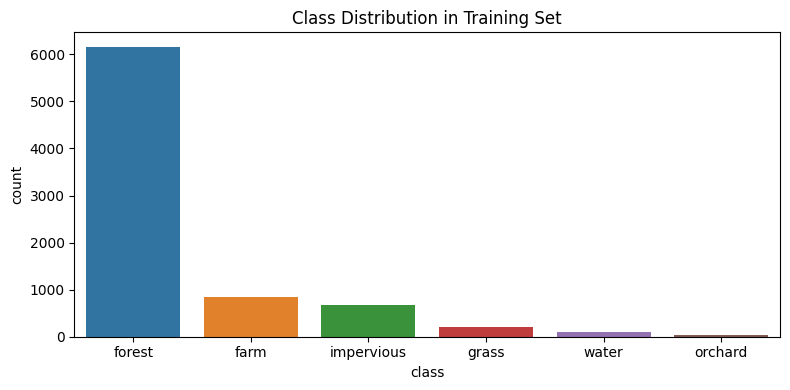

In [12]:
plt.figure(figsize=(8, 4))
sns.countplot(x="class", data=train_df, order=train_df["class"].value_counts().index)
plt.title("Class Distribution in Training Set")
plt.tight_layout()
plt.show()

In [13]:
# Forest is dominating, we need to balance
# Balacing can be done using class weight in Logistic Regression

### Label encode the target

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, fbeta_score, classification_report

In [15]:
label_encoder = LabelEncoder()
train_df["class"] = label_encoder.fit_transform(train_df["class"])

## **Preparing Training Data**

In [16]:
X = train_df.drop(columns=['class'])
Y = train_df['class']

In [17]:
X.head()

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,637.5950,658.668000,-1882.030000,-1924.36,997.904000,-1739.990000,630.087000,4987.520158,-1325.64,-944.084000,...,4872.68167,-1043.160,-1942.490000,267.138,2041.316792,2799.820342,211.328,-2203.020,-1180.190000,433.906
1,634.2400,593.705000,-1625.790000,-1672.32,914.198000,-692.386000,707.626000,-1670.590000,-1408.64,-989.285000,...,4872.68167,-933.934,-625.385000,120.059,364.858000,476.972000,220.878,-2250.000,-1360.560000,524.075
2,58.0174,-1599.160000,4469.837748,-1052.63,2927.586705,-1564.630000,3313.881373,729.790000,-3162.14,5237.037739,...,-1025.88000,368.622,3012.178524,-1227.800,304.621000,2799.820342,369.214,-2202.120,2629.203972,-1343.550
3,72.5180,4868.091395,380.436000,-1256.93,515.805000,-1413.180000,-802.942000,683.254000,-2829.40,-1267.540000,...,-1813.95000,155.624,3012.178524,-924.073,432.150000,282.833000,298.320,-2197.360,2629.203972,-826.727
4,1136.4400,4868.091395,4469.837748,1647.83,1935.800000,4924.493648,2158.980000,4987.520158,1242.87,-2646.050000,...,1535.00000,1959.430,-279.317000,-384.915,-113.406000,1020.720000,1660.650,-116.801,-568.050000,-1357.140


In [18]:
Y.head()

0    5
1    5
2    5
3    5
4    5
Name: class, dtype: int64

# **Feature engineering for Training DataSet**

In [19]:
X_df = pd.DataFrame(X, columns = X.columns)
# Average NDVI
X_df["ndvi_mean"] = X_df.mean(axis=1)
# Seasonal change in NDVI
X_df["ndvi_std"] = X_df.std(axis=1)
# Lowest NDVI
X_df["ndvi_min"] = X_df.min(axis=1)
# Peak NDVI
X_df["ndvi_max"] = X_df.max(axis=1)
# Spread
X_df["ndvi_range"] = X_df["ndvi_max"] - X_df["ndvi_min"]
# Cental Tendency
X_df["ndvi_median"] = X_df.median(axis=1)
# Lower Quartile
X_df["ndvi_Q25"] = X_df.quantile(0.25, axis=1)
# Upper Quartile
X_df["ndvi_Q75"] = X_df.quantile(0.75,axis=1)
# Inter-Quartile Range
X_df["ndvi_IQR"] = X_df["ndvi_Q75"] - X_df["ndvi_Q25"]
# Assymetry of curve
X_df["ndvi_skew"] = X_df.skew(axis=1)
# Trend(slope) of the Dataset
x = np.arange(len(ndvi_columns))
X_df["ndvi_trend"] = X_df[ndvi_columns].apply(
    lambda row: np.polyfit(x, row.values, 1)[0], axis=1)

In [20]:
X_df.head()

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,ndvi_std,ndvi_min,ndvi_max,ndvi_range,ndvi_median,ndvi_Q25,ndvi_Q75,ndvi_IQR,ndvi_skew,ndvi_trend
0,637.5950,658.668000,-1882.030000,-1924.36,997.904000,-1739.990000,630.087000,4987.520158,-1325.64,-944.084000,...,1840.743558,-2203.02,4987.520158,7190.540158,462.953500,-1043.160,935.76500,1978.92500,1.119170,14.988751
1,634.2400,593.705000,-1625.790000,-1672.32,914.198000,-692.386000,707.626000,-1670.590000,-1408.64,-989.285000,...,1333.872657,-2250.00,4872.681670,7122.681670,217.539000,-933.934,624.10625,1558.04025,1.857678,12.636178
2,58.0174,-1599.160000,4469.837748,-1052.63,2927.586705,-1564.630000,3313.881373,729.790000,-3162.14,5237.037739,...,2084.330697,-3162.14,5237.037739,8399.177739,482.166000,-1052.630,2757.16625,3809.79625,0.702970,-20.074008
3,72.5180,4868.091395,380.436000,-1256.93,515.805000,-1413.180000,-802.942000,683.254000,-2829.40,-1267.540000,...,1572.510579,-2829.40,4868.091395,7697.491395,307.920500,-826.727,652.84825,1479.57525,1.447176,-7.452908
4,1136.4400,4868.091395,4469.837748,1647.83,1935.800000,4924.493648,2158.980000,4987.520158,1242.87,-2646.050000,...,1914.561828,-2646.05,4987.520158,7633.570158,1442.932009,-113.406,2109.09250,2222.49850,0.520729,-131.831897


## **Removing Outliers**

In [21]:
Q1 = X_df.quantile(0.25)
Q3 = X_df.quantile(0.75)
IQR = Q3-Q1

Outliers = ~((X_df >= (Q1- 1.5 * IQR)) & (X_df <= (Q3 + 1.5 * IQR))).all(axis=1)

X_df_cleaned = X_df[~Outliers]
Y_cleaned = Y[~Outliers]

In [22]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 38 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   20150720_N   8000 non-null   float64
 1   20150602_N   8000 non-null   float64
 2   20150517_N   8000 non-null   float64
 3   20150501_N   8000 non-null   float64
 4   20150415_N   8000 non-null   float64
 5   20150330_N   8000 non-null   float64
 6   20150314_N   8000 non-null   float64
 7   20150226_N   8000 non-null   float64
 8   20150210_N   8000 non-null   float64
 9   20150125_N   8000 non-null   float64
 10  20150109_N   8000 non-null   float64
 11  20141117_N   8000 non-null   float64
 12  20141101_N   8000 non-null   float64
 13  20141016_N   8000 non-null   float64
 14  20140930_N   8000 non-null   float64
 15  20140813_N   8000 non-null   float64
 16  20140626_N   8000 non-null   float64
 17  20140610_N   8000 non-null   float64
 18  20140525_N   8000 non-null   float64
 19  201405

In [23]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8000 entries, 0 to 7999
Series name: class
Non-Null Count  Dtype
--------------  -----
8000 non-null   int64
dtypes: int64(1)
memory usage: 62.6 KB


## **Train Test Split**

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_df, Y, test_size = 0.2, random_state = 42)

In [25]:
X_test.head()

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,ndvi_std,ndvi_min,ndvi_max,ndvi_range,ndvi_median,ndvi_Q25,ndvi_Q75,ndvi_IQR,ndvi_skew,ndvi_trend
2215,5845.476916,7755.64,6955.480,2275.80,7329.220,7474.68,3961.58,6674.00,7782.02,7925.44,...,2443.515082,132.350,8278.08,8145.730,5155.680000,2801.923271,7235.785000,4433.861729,-0.283362,-129.530238
2582,5845.476916,8218.03,5965.590,5014.90,7803.670,3713.92,2206.76,4159.08,7099.57,7879.97,...,2414.364481,408.579,8218.03,7809.451,4401.945000,2251.160000,6916.562500,4665.402500,0.067612,-81.816620
1662,5845.476916,6554.26,5517.160,6705.12,5301.180,7638.14,4679.27,7600.79,7236.17,7256.27,...,2456.745617,418.154,8177.47,7759.316,5065.990000,2456.745617,7070.250000,4613.504383,-0.285927,-143.118587
3027,5845.476916,6230.48,779.933,6424.40,318.335,3870.53,2377.25,6539.02,7165.04,6698.30,...,2301.191516,318.335,7165.04,6846.705,3453.552860,2144.360224,6376.698569,4232.338345,0.012104,-52.702649
4343,5845.476916,1117.14,6511.560,2079.74,7390.080,6735.03,2318.85,6932.11,7255.45,8004.68,...,2888.687218,393.632,8004.68,7611.048,2733.568544,1117.140000,6954.947500,5837.807500,0.187619,-82.011514


In [26]:
print(X_train.shape)
print(X_test.shape)

(6400, 38)
(1600, 38)


In [27]:
Y_test.head()

2215    1
2582    1
1662    1
3027    1
4343    1
Name: class, dtype: int64

In [28]:
print(Y_train.shape)
print(Y_test.shape)

(6400,)
(1600,)


## **Scaling Features**

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Model and Training**

In [30]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, C=100, penalty='l2', class_weight='balanced')
model.fit(X_train_scaled, Y_train)

LogisticRegression(C=100, class_weight='balanced', max_iter=1000,
                   multi_class='multinomial')

In [31]:
Y_pred = model.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(Y_test, Y_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_pred, average='weighted'):.4f}")
print(f"F2 Score: {fbeta_score(Y_test, Y_pred, beta=2, average='weighted'):.4f}")
print(f"Validation Classification Report:\n", classification_report(Y_test, Y_pred, target_names=label_encoder.classes_))

Accuracy: 0.8325
F1 Score: 0.8581
F2 Score: 0.8391
Validation Classification Report:
               precision    recall  f1-score   support

        farm       0.55      0.75      0.63       161
      forest       0.99      0.85      0.91      1231
       grass       0.35      0.91      0.50        43
  impervious       0.88      0.75      0.81       141
     orchard       0.03      0.17      0.04         6
       water       0.39      0.94      0.55        18

    accuracy                           0.83      1600
   macro avg       0.53      0.73      0.57      1600
weighted avg       0.90      0.83      0.86      1600



# **Reading Test Data**

In [32]:
test_df = pd.read_csv('/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv')

In [33]:
test_df

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,7466.4200,413.162,5761.000,5625.45,489.4030,3923.84,3097.110,6766.42000,...,801.184,927.115,4704.14,6378.42,340.949,2695.5700,527.268,4736.75,601.843,6639.760
1,1,2,7235.2600,6037.350,1027.560,6085.14,1618.0500,6668.54,2513.990,1051.69000,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.1400,3298.110,6942.68,1070.440,842.101
2,2,3,7425.0800,6969.980,1177.940,7408.93,861.0610,7644.43,814.458,1504.29000,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.9900,2206.100,6928.93,1036.560,831.441
3,3,4,7119.1200,1731.620,6311.930,6441.61,465.9790,7128.42,1649.120,6935.22000,...,959.344,5794.150,1045.57,5572.90,586.287,685.9060,1287.000,6734.72,824.584,6883.610
4,4,5,7519.5500,8130.260,1482.540,7879.53,1001.2100,7937.60,4122.530,1094.51000,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.5200,3283.940,7937.68,1857.800,1336.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,2840,2841,-1673.7400,-2514.480,-2451.190,-2738.44,64.4464,-2275.03,-2881.100,-4738.97000,...,-2257.890,-2582.420,-1699.10,-2295.30,306.483,209.4030,221.920,-4885.15,-2630.590,356.233
2841,2841,2842,-96.8233,-412.727,-1795.400,-2363.82,-2168.1900,-2162.68,-3155.740,-4416.11000,...,-3991.910,-2614.910,-2109.84,-2687.18,-2853.890,71.3402,-86.414,-5109.01,324.637,-4316.580
2842,2842,2843,-2364.6000,-155.592,-1422.090,-1713.40,465.6220,-2230.40,-3088.730,-5010.32000,...,-2484.500,-1756.080,-3820.43,-1988.23,433.852,291.8000,254.548,-4259.30,412.115,-1170.750
2843,2843,2844,-3004.6300,-1217.120,180.122,-1113.89,438.4180,-2442.51,-3210.560,-3237.74000,...,-3291.490,-2018.450,-3472.65,-3109.07,511.792,369.0970,276.948,-5574.51,298.739,460.419


In [34]:
test_df.isnull().sum()
# To check whether null entries are there or not
# No null found

Unnamed: 0    0
ID            0
20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
20140101_N    0
dtype: int64

## **Drop redundant column**

In [35]:
# First drop 'Unnamed: 0'
test_df.drop(columns=["Unnamed: 0"], inplace=True)
# Before dropping ID column we will store this as 'ID'
ID = test_df['ID']
# Then drop 'ID'
test_df.drop(columns=["ID"], inplace=True)

In [36]:
test_df.head()

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,7466.42,413.162,5761.00,5625.45,489.403,3923.84,3097.110,6766.42,2829.13,6742.570,...,801.184,927.115,4704.14,6378.42,340.949,2695.570,527.268,4736.75,601.843,6639.760
1,7235.26,6037.350,1027.56,6085.14,1618.050,6668.54,2513.990,1051.69,7268.22,6908.180,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.140,3298.110,6942.68,1070.440,842.101
2,7425.08,6969.980,1177.94,7408.93,861.061,7644.43,814.458,1504.29,7002.63,6086.560,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.990,2206.100,6928.93,1036.560,831.441
3,7119.12,1731.620,6311.93,6441.61,465.979,7128.42,1649.120,6935.22,2176.80,690.408,...,959.344,5794.150,1045.57,5572.90,586.287,685.906,1287.000,6734.72,824.584,6883.610
4,7519.55,8130.260,1482.54,7879.53,1001.210,7937.60,4122.530,1094.51,7951.44,8001.350,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.520,3283.940,7937.68,1857.800,1336.920


# **Feature Engineering for test Dataset**

In [37]:
test_df_fe = pd.DataFrame(test_df, columns = test_df.columns)
test_df_fe["ndvi_mean"] =test_df_fe.mean(axis=1)                     # Average NDVI
test_df_fe["ndvi_std"] = test_df_fe.std(axis=1)                      # Seasonal change in NDVI
test_df_fe["ndvi_min"] = test_df_fe.min(axis=1)                      # Peak NDVI
test_df_fe["ndvi_max"] = test_df_fe.max(axis=1)                      # Lowest NDVI
test_df_fe["ndvi_range"] = test_df_fe["ndvi_max"] - test_df_fe["ndvi_min"] # Spread
test_df_fe["ndvi_median"] = test_df_fe.median(axis=1)                # Cental Tendency
test_df_fe["ndvi_Q25"] = test_df_fe.quantile(0.25, axis=1)           # Lower Quartile
test_df_fe["ndvi_Q75"] = test_df_fe.quantile(0.75,axis=1)            # Upper Quartile
test_df_fe["ndvi_IQR"] = test_df_fe["ndvi_Q75"] - test_df_fe["ndvi_Q25"] # Inter-Quartile Range
test_df_fe["ndvi_skew"] = test_df_fe.skew(axis=1)                    # Assymetry of curve
x = np.arange(len(ndvi_columns))
test_df_fe["ndvi_trend"] = test_df_fe[ndvi_columns].apply(
    lambda row: np.polyfit(x, row.values, 1)[0], axis=1)             # Trend(slope) of the Dataset

In [38]:
test_df_fe.head()

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,ndvi_std,ndvi_min,ndvi_max,ndvi_range,ndvi_median,ndvi_Q25,ndvi_Q75,ndvi_IQR,ndvi_skew,ndvi_trend
0,7466.42,413.162,5761.00,5625.45,489.403,3923.84,3097.110,6766.42,2829.13,6742.570,...,2430.733131,340.949,7466.42,7125.471,3220.319889,879.812,5596.4525,4716.6405,0.134252,-58.403572
1,7235.26,6037.350,1027.56,6085.14,1618.050,6668.54,2513.990,1051.69,7268.22,6908.180,...,2467.849736,535.296,7425.84,6890.544,3524.387352,1234.140,6073.1925,4839.0525,0.087567,-68.965761
2,7425.08,6969.980,1177.94,7408.93,861.061,7644.43,814.458,1504.29,7002.63,6086.560,...,2754.606310,522.798,7644.43,7121.632,3272.495488,1177.940,6959.7175,5781.7775,0.112851,-73.940891
3,7119.12,1731.620,6311.93,6441.61,465.979,7128.42,1649.120,6935.22,2176.80,690.408,...,2578.418493,465.979,7128.42,6662.441,2377.609247,976.340,6203.2650,5226.9250,0.335907,-49.364616
4,7519.55,8130.260,1482.54,7879.53,1001.210,7937.60,4122.530,1094.51,7951.44,8001.350,...,2924.537746,550.508,8130.26,7579.752,4406.920352,1482.540,7621.9905,6139.4505,-0.023328,-78.656631


### **Scaling Test Dataset**

In [39]:
test_df_scaled = scaler.transform(test_df_fe)

# **Using Model to predict class of Test Dataset**

In [40]:
Y_test = model.predict(test_df_scaled)
Y_test

array([4, 4, 4, ..., 5, 5, 5])

In [41]:
Y_decoded = label_encoder.inverse_transform(Y_test)
Y_decoded

array(['orchard', 'orchard', 'orchard', ..., 'water', 'water', 'water'],
      dtype=object)

In [42]:
submission=pd.DataFrame({'ID': ID, 'class': Y_decoded})
submission

,ID,class
0,1,orchard
1,2,orchard
2,3,orchard
3,4,orchard
4,5,orchard
...,...,...
2840,2841,water
2841,2842,water
2842,2843,water
2843,2844,water


In [43]:
submission.to_csv('logistic_regression_ndvi_predictions_submission.csv', index=False)

# **Basic EDA on Predicted Class of Test Dataset**

In [44]:
submission['class'].value_counts()

class
forest        1272
farm           606
impervious     344
grass          324
water          196
orchard        103
Name: count, dtype: int64

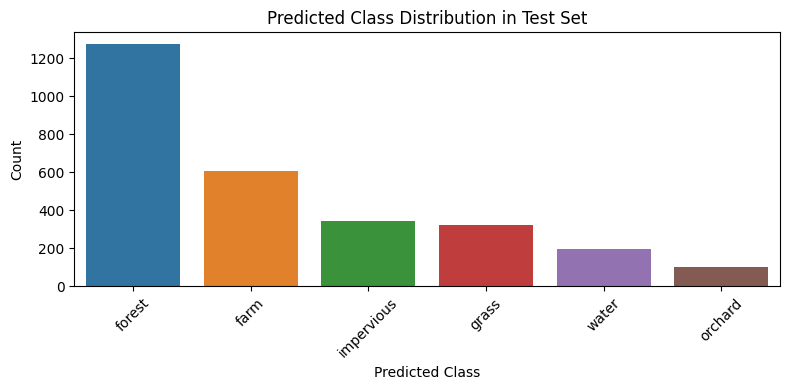

In [45]:
plt.figure(figsize=(8, 4))
sns.countplot(x="class", data=submission, order=submission["class"].value_counts().index)
plt.title("Predicted Class Distribution in Test Set")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()